<a href="https://colab.research.google.com/github/jarrodsb/PHYS_313/blob/main/HW1/Bieber_PHYS313_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHYS 313 - Homework 1
## Jarrod Bieber
---



In [233]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import constants
from scipy.optimize import curve_fit

### Load Data from GitHub Text Files

Please replace the placeholder URLs with the actual raw URLs of your text files from the GitHub repository. You can usually get the raw URL by navigating to the file on GitHub and clicking the 'Raw' button.

In [234]:
sw = pd.read_csv('https://raw.githubusercontent.com/jarrodsb/PHYS_313/refs/heads/main/HW1/sine_waves.txt', sep=r'\t')
gauss = pd.read_csv('https://raw.githubusercontent.com/jarrodsb/PHYS_313/refs/heads/main/HW1/two_Gauss.txt', sep='\t', usecols=[0, 1, 2]) # Remove empty columns

display(sw.head())
display(gauss.head())

/tmp/ipython-input-1459966748.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  sw = pd.read_csv('https://raw.githubusercontent.com/jarrodsb/PHYS_313/refs/heads/main/HW1/sine_waves.txt', sep=r'\t')


,Distance[mm],t=0 sec,t=1sec
0,0,0.000000,2.945148
1,1,1.145181,3.401783
2,2,2.164294,3.483928
3,3,2.945148,3.182541
4,4,3.401783,2.530801


,Position[cm],Wave at 1 sec,Wave at 3 sec
0,0.1,4.789548e-11,0.0
1,0.2,7.392279e-11,0.0
2,0.3,1.136384e-10,0.0
3,0.4,1.739941e-10,0.0
4,0.5,2.653424e-10,0.0


This Defines functions that can be used

In [235]:
#def MYFUN(x, var1, var2, var3):
#   return function

def Line(x, a, b):
    return a*x+b

def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def Sine(x, a, w, phi):
    return a*np.sin(x*w+phi)

def dampsin(x, a, w, phi, b, c):
    return a*np.sin(x*w+phi)*np.exp(-b*x)+c

def decay(x,a,tau,c):
    return a*np.exp(-x/tau)+c


---


## Sine Waves

---


In [236]:
x = sw['Distance[mm]']
y1 = sw['t=0 sec']
y2 = sw['t=1sec']

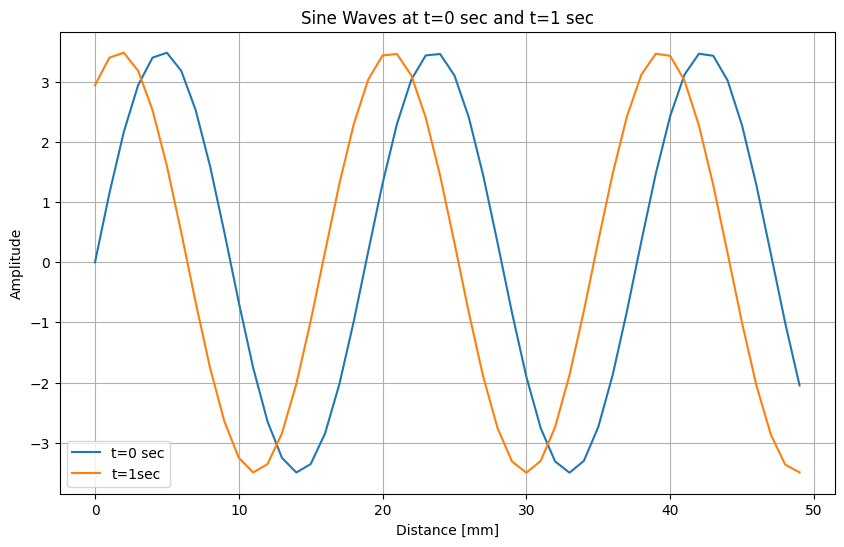

In [237]:
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='t=0 sec')
plt.plot(x, y2, label='t=1sec')
plt.xlabel('Distance [mm]')
plt.ylabel('Amplitude')
plt.title('Sine Waves at t=0 sec and t=1 sec')
plt.legend()
plt.grid(True)
plt.show()

I can find the amplitude by taking the max value from the 't=0 sec' column of the Sine wave table.

In [238]:
ampl = sw['t=0 sec'].abs().max()
print(f"Amplitude (A): {ampl:.4f}")

Amplitude (A): 3.5000


Visually, the wavelength (lambda) appears to be about 18.5 mm, judging by the first two zero crossings. This also allows me to find the wave number k.

In [239]:
wavelength = 18.5  # mm
k = 2 * np.pi / wavelength  # wave number in mm^-1

print(f"Wavelength (lambda): {wavelength:.1f} mm")
print(f"Wave number (k): {k:.4f} rad/mm")

Wavelength (lambda): 18.5 mm
Wave number (k): 0.3396 rad/mm


I can determine frequency omega from the phase shift at x = 0 between t=0 and t=1.

I assume the form y(x,t) = A * sin(kx + omega*t).

At t=0, y(x,0) = A * sin(kx). (This is consistent with y(0,0) = 0.)

At t=1, y(0,1) = A * sin(omega).

I find omega by taking the arcsine of y(0,1)/A

In [240]:
y_0_t1 = sw['t=1sec'][0]
omega = np.arcsin(y_0_t1 / ampl) # angular frequency in rad/s

print(f"Angular frequency (omega): {omega:.4f} rad/s")

Angular frequency (omega): 1.0000 rad/s


Now that I have the frequency (omega) and the wave number (k), I can find the velocity by dividing omega by k. The velocity appears to be negative (moving in the negative x direction).

In [241]:
# Calculate wave speed for reference
v = -omega / k # mm/s (negative indicates propagation in negative x direction)

print(f"Wave speed (v): {v:.4f} mm/s")

Wave speed (v): -2.9444 mm/s


**Therefore, my guess for the equation of the sine wave is: $y(x,t)=3.500\sin{\left(0.3396x+2.9444t\right)}$**

In [242]:
print(f"y(x,t) = {ampl:.4f} * sin({k:.4f} * x - ({v:.4f}) * t)")

y(x,t) = 3.5000 * sin(0.3396 * x - (-2.9444) * t)


This is the curve fitting routine for the sine wave at t = 0

In [243]:
#popt,pcov = curve_fit(FUNCTION HERE, x, y, p0=[GUESS 1, GUESS 2,  GUESS 3, etc.]) #popt is the optimized parameters
popt,pcov = curve_fit(Sine, x, y1, p0=[3.5, 0.34, 0]) #popt is the optimized parameters

This plots the data and the fit

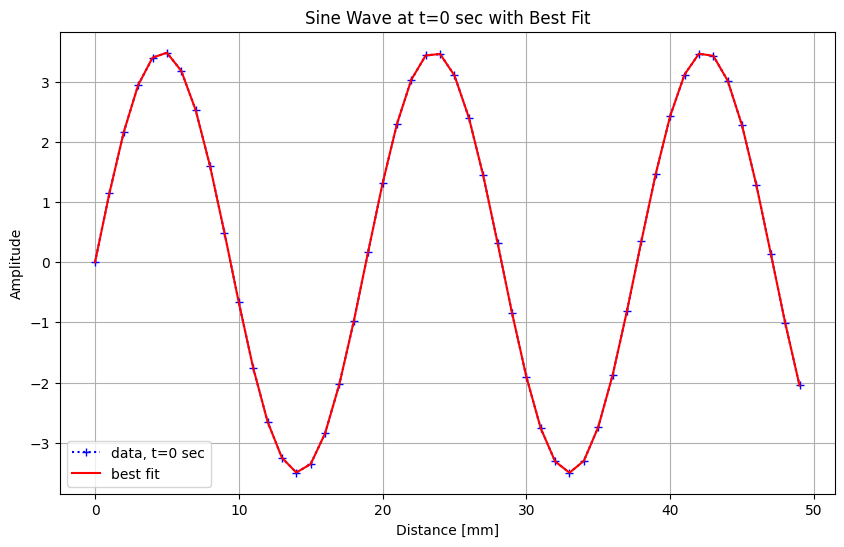

In [244]:
plt.figure(figsize=(10, 6))
plt.plot(x, y1, 'b+:', label='data, t=0 sec')
plt.plot(x, Sine(x, *popt), 'r-', label='best fit')
plt.xlabel('Distance [mm]')
plt.ylabel('Amplitude')
plt.title('Sine Wave at t=0 sec with Best Fit')
plt.legend()
plt.grid(True)
plt.show()

This calculates the standard error to the fit

In [245]:
popterrs=np.sqrt(np.diag(np.abs(pcov)))  #calculates the standard error of the fit parameters

print('The amplitude is',str.format('{0:.4f}', popt[0]), 'with a standard error of ', str.format('{0:.4f}', popterrs[0]))
print('The wave number is',str.format('{0:.4f}', popt[1]), 'with a standard error of ', str.format('{0:.4f}', popterrs[1]))
print('The phase is',str.format('{0:.4f}', popt[2]), 'with a standard error of ', str.format('{0:.4f}', popterrs[2]))

The amplitude is 3.5000 with a standard error of  0.0000
The wave number is 0.3333 with a standard error of  0.0000
The phase is -0.0000 with a standard error of  0.0000


This is the curve fitting routine for the sine wave at t = 1

In [246]:
popt,pcov = curve_fit(Sine, x, y2, p0=[3.5, 0.34, constants.pi/3]) #popt is the optimized parameters

This plots the data and the fit

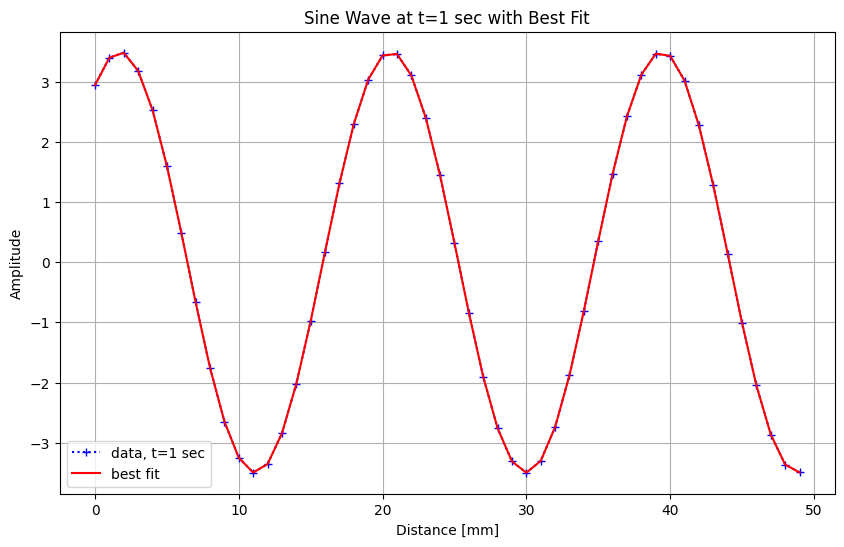

In [247]:
plt.figure(figsize=(10, 6))
plt.plot(x, y2, 'b+:', label='data, t=1 sec')
plt.plot(x, Sine(x, *popt), 'r-', label='best fit')
plt.xlabel('Distance [mm]')
plt.ylabel('Amplitude')
plt.title('Sine Wave at t=1 sec with Best Fit')
plt.legend()
plt.grid(True)
plt.show()

This calculates the standard error to the fit

In [248]:
popterrs=np.sqrt(np.diag(np.abs(pcov)))  #calculates the standard error of the fit parameters

print('The amplitude is',str.format('{0:.4f}', popt[0]), 'with a standard error of ', str.format('{0:.4f}', popterrs[0]))
print('The wave number is',str.format('{0:.4f}', popt[1]), 'with a standard error of ', str.format('{0:.4f}', popterrs[1]))
print('The phase is',str.format('{0:.4f}', popt[2]), 'with a standard error of ', str.format('{0:.4f}', popterrs[2]))

The amplitude is 3.5000 with a standard error of  0.0000
The wave number is 0.3333 with a standard error of  0.0000
The phase is 1.0000 with a standard error of  0.0000


Since the phase changes from 0 to 1 radians between t=0 and  t=1 sec, my previous deduction of $\omega=1$ rad/s was correct. My predicted velocity of $v=\frac{-\omega}{k}=-2.9444\frac{mm}{s}$ should also be correct.

**The best fit solution for the equation of the sine wave is: $y(x,t)=3.500\sin{\left(0.3333x+2.9444t\right)}$**


---


## Gaussian Waves

---



In [249]:
x = gauss['Position[cm]']
y1 = gauss['Wave at 1 sec']
y2 = gauss['Wave at 3 sec']

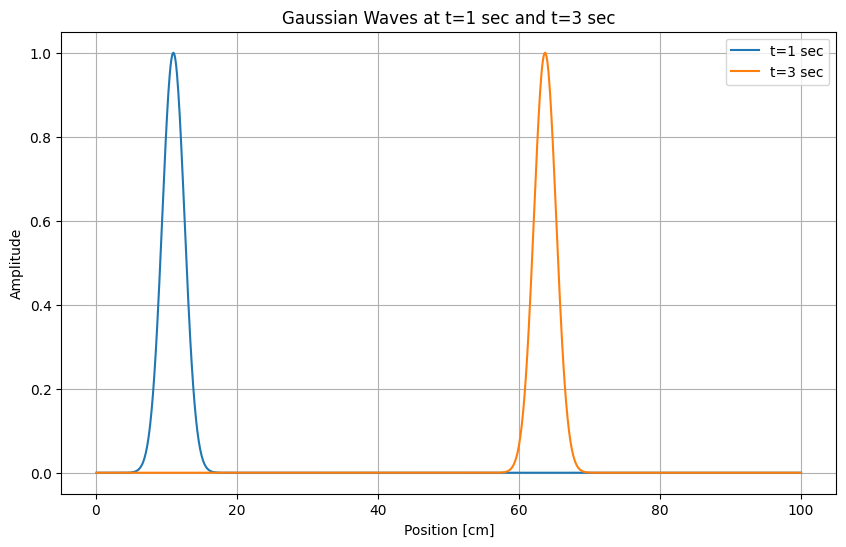

In [250]:
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='t=1 sec')
plt.plot(x, y2, label='t=3 sec')
plt.xlabel('Position [cm]')
plt.ylabel('Amplitude')
plt.title('Gaussian Waves at t=1 sec and t=3 sec')
plt.legend()
plt.grid(True)
plt.show()

In [251]:
# Assume a Gaussian of the form A * exp(-(x-x0)^2 / (2*sigma^2)),

ampl_gauss = gauss['Wave at 1 sec'].abs().max()
print(f"Amplitude (A): {ampl_gauss:.4f}")

Amplitude (A): 1.0000


In [252]:
# Find the position of the peak at t=1 sec (initial center, x0)
center_t1_idx = gauss['Wave at 1 sec'].idxmax()
initial_center = gauss['Position[cm]'].iloc[center_t1_idx]

print(f"index {center_t1_idx}")
print(f"The initial center (x0): {initial_center} cm")

index 109
The initial center (x0): 11.0 cm


In [253]:
# Find the position of the peak at t=3 sec
center_t3_idx = gauss['Wave at 3 sec'].idxmax()
center_t3 = gauss['Position[cm]'].iloc[center_t3_idx]

print(f"index {center_t3_idx}")
print(f"The center of peak t=3: {center_t3} cm")

index 636
The center of peak t=3: 63.7 cm


In [254]:
# Calculate the velocity
velocity_gauss = (center_t3 - initial_center) / (3 - 1) # cm/s

print(f"Velocity (v): {velocity_gauss:.4f} cm/s")

Velocity (v): 26.3500 cm/s


In [255]:
# Estimate sigma (width) of the Gaussian at t=1 sec
# For a Gaussian A * exp(-(x-x0)^2 / (2*sigma^2)), when y = A * exp(-1), (x-mu)^2 = 2*sigma^2
# So, abs(x-mu) = sqrt(2)*sigma

# Find points where the amplitude is close to A_gauss / exp(1)
# This is an approximation of sigma.
target_ampl = ampl_gauss / np.exp(1)
diff_t1 = np.abs(gauss['Wave at 1 sec'] - target_ampl)
idx_close_t1 = diff_t1.nsmallest(2).index.tolist()

x_val1 = gauss['Position[cm]'].iloc[idx_close_t1[0]]
x_val2 = gauss['Position[cm]'].iloc[idx_close_t1[1]]

print(x_val1)
print(x_val2)

8.8
13.2


In [256]:
# Assuming the two points are roughly symmetric around the center
estimated_sigma = np.abs(x_val1 - initial_center) / np.sqrt(2)

print(f"Estimated sigma (width): {estimated_sigma:.4f} cm")

Estimated sigma (width): 1.5556 cm


In [257]:
# The equation for a Gaussian wave is generally y(x,t) = A * exp(-(x - vt - x0)^2 / (2 * sigma^2))
# However, the peaks are at x=11.0 and x=63.7 for t=1 and t=3 respectively. The wave is moving in the positive x direction.
# And since initial_center is at t=1, I need to find the effective x0 at t=0
# x(t) = x0 + vt
# initial_center = x0 + v * 1 => x0 = initial_center - v
x0_at_t0 = initial_center - velocity_gauss

print(x0_at_t0)

-15.350000000000001


**Therefore, my guess for the equation of the Gaussian wave is approximately:** $y(x,t)=1.000\exp{\left(-\frac{\left(x-26.3500 t -15.3500\right)^2}{2 * 1.5556^2}\right)}$

In [258]:
print(f"y(x,t) = {ampl_gauss:.4f} * exp(-(x - {velocity_gauss:.4f}*t - {x0_at_t0:.4f})^2 / (2 * {estimated_sigma:.4f}^2))")

y(x,t) = 1.0000 * exp(-(x - 26.3500*t - -15.3500)^2 / (2 * 1.5556^2))


This is the curve fitting routine for the gaussian wave at t = 1 sec

In [259]:
#popt,pcov = curve_fit(FUNCTION HERE, x, y, p0=[GUESS 1, GUESS 2,  GUESS 3, etc.]) #popt is the optimized parameters
popt,pcov = curve_fit(Gauss, x, y1, p0=[1, 11, 1.5]) #popt is the optimized parameters

This plots the data and the fit

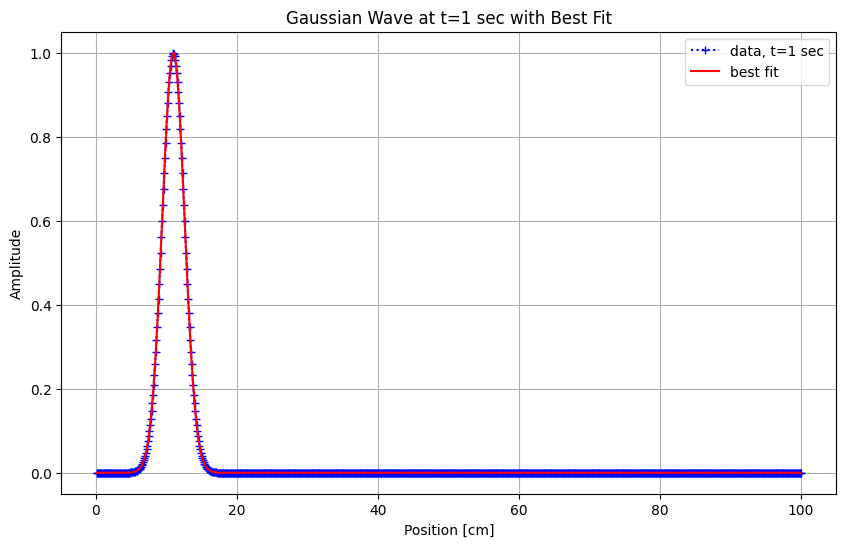

In [260]:
plt.figure(figsize=(10, 6))
plt.plot(x, y1, 'b+:', label='data, t=1 sec')
plt.plot(x, Gauss(x, *popt), 'r-', label='best fit')
plt.xlabel('Position [cm]')
plt.ylabel('Amplitude')
plt.title('Gaussian Wave at t=1 sec with Best Fit')
plt.legend()
plt.grid(True)
plt.show()

This calculates the standard error to the fit

In [261]:
popterrs=np.sqrt(np.diag(np.abs(pcov)))  #calculates the standard error of the fit parameters

print('The amplitude is',str.format('{0:.4f}', popt[0]), 'with a standard error of ', str.format('{0:.4f}', popterrs[0]))
print('The offset is',str.format('{0:.4f}', popt[1]), 'with a standard error of ', str.format('{0:.4f}', popterrs[1]))
print('The FWHM is',str.format('{0:.4f}', popt[2]), 'with a standard error of ', str.format('{0:.4f}', popterrs[2]))

The amplitude is 1.0000 with a standard error of  0.0000
The offset is 11.0000 with a standard error of  0.0000
The FWHM is 1.5811 with a standard error of  0.0000


This is the curve fitting routine for the gaussian wave at t = 1 sec

In [262]:
popt,pcov = curve_fit(Gauss, x, y2, p0=[1, 64, 1.5]) #popt is the optimized parameters

This plots the data and the fit

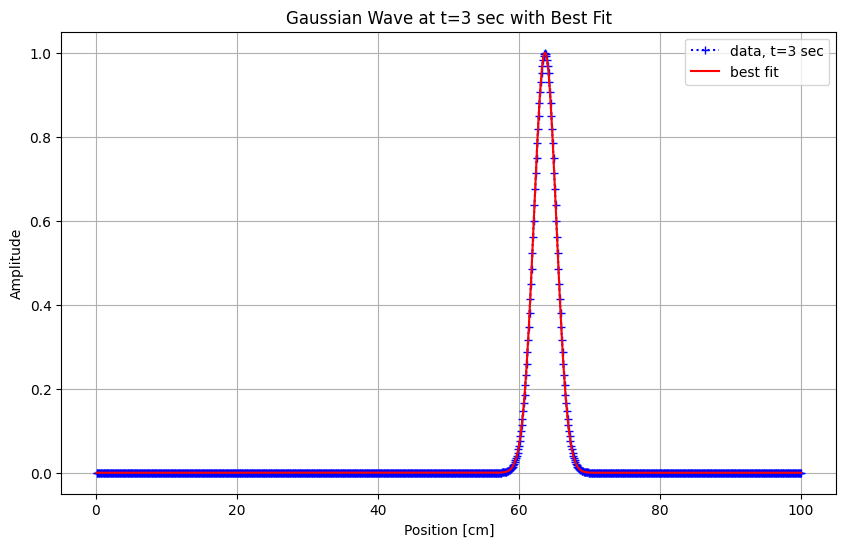

In [263]:
plt.figure(figsize=(10, 6))
plt.plot(x, y2, 'b+:', label='data, t=3 sec')
plt.plot(x, Gauss(x, *popt), 'r-', label='best fit')
plt.xlabel('Position [cm]')
plt.ylabel('Amplitude')
plt.title('Gaussian Wave at t=3 sec with Best Fit')
plt.legend()
plt.grid(True)
plt.show()

This calculates the standard error to the fit

In [264]:
popterrs=np.sqrt(np.diag(np.abs(pcov)))  #calculates the standard error of the fit parameters

print('The amplitude is',str.format('{0:.4f}', popt[0]), 'with a standard error of ', str.format('{0:.4f}', popterrs[0]))
print('The offset is',str.format('{0:.4f}', popt[1]), 'with a standard error of ', str.format('{0:.4f}', popterrs[1]))
print('The FWHM is',str.format('{0:.4f}', popt[2]), 'with a standard error of ', str.format('{0:.4f}', popterrs[2]))

The amplitude is 1.0000 with a standard error of  0.0000
The offset is 63.7000 with a standard error of  0.0000
The FWHM is 1.5811 with a standard error of  0.0000


Based on the best fits of the offsets (11cm at t=1 and 63.7cm at t=3), my predicted velocity of 26.3500 cm/s was correct.

**The best fit solution for the equation of the Gaussian wave is approximately:** $y(x,t)=1.000\exp{\left(-\frac{\left(x-26.3500 t -15.3500\right)^2}{2 * 1.5811^2}\right)}$